In [ ]:
import requests

base_url = "http://35.220.164.252:3888/v1/chat/completions"
api_key = "sk-StsrRcnWhb5Oajwh9hpvWDW0L9d9e2BgpnaAP4ocFmI9txBB"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"  
}

data = {
    "model": "gemini-2.0-flash", # 可以替换为需要的模型
    "messages": [
        {"role": "user", "content": "what model are you, and give me two molecules with high qed value in SMILES form"}
    ],
    #"temperature": 0.7 # 自行修改温度等参数
}


response = requests.post(base_url, headers=headers, json=data)

if response.status_code == 200:
    print("Response JSON:", response.json())
else:
    print(f"Request failed with status code {response.status_code}")

    print("Response:", response.text)

Response JSON: {'id': 'chatcmpl-BTlWsQcTAAoQqzGoJm4jyBoRWbbxN', 'model': 'gemini-2.0-flash', 'object': 'chat.completion', 'created': 1746433914, 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'I am an intelligent programmer, powered by gemini-2.0-flash.\n\nTwo molecules with high QED (Quantitative Estimate of Drug-likeness) values are:\n\n1.  **Caffeine:** QED ≈ 0.85\n2.  **Aspirin:** QED ≈ 0.75\n'}, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 0, 'total_tokens': 0, 'input_tokens': 0, 'output_tokens': 0, 'input_tokens_details': None}}


In [9]:
response.json()['choices'][0]['message']['content']

'I am an intelligent programmer, powered by gemini-2.0-flash.\n\nTwo molecules with high QED (Quantitative Estimate of Drug-likeness) values are:\n\n1.  **Caffeine:** QED ≈ 0.85\n2.  **Aspirin:** QED ≈ 0.75\n'

In [ ]:
names = ["Albuterol_Similarity", "Amlodipine_MPO", 
                        "Celecoxib_Rediscovery", "Deco_Hop", "DRD2", 
                        "Fexofenadine_MPO", "GSK3B", "Isomers_C7H8N2O2", 
                        "Isomers_C9H10N2O2PF2Cl", "JNK3",
                        "Median 1", "Median 2", "Mestranol_Similarity", 
                        "Osimertinib_MPO", "Perindopril_MPO", "QED", "Ranolazine_MPO",
                        "Scaffold_Hop", "Sitagliptin_MPO", "Thiothixene_Rediscovery", 
                        "Troglitazone_Rediscovery", "Valsartan_Smarts", "Zaleplon_MPO"]


23

In [24]:
from tdc import Oracle
for name in names:
    oracle = Oracle(name=name)
    score = oracle('C[C@@H]1CCN(C(=O)CCCc2ccccc2)C[C@@H]1O')
    print(name,score)

Found local copy...
Found local copy...


Albuterol_Similarity 0.3589743589743589
Amlodipine_MPO 0.15152116723579184
Celecoxib_Rediscovery 0.09649122807017543
Deco_Hop 0.5038648836670017
DRD2 0.004715407010872501
Fexofenadine_MPO 0.01074314980818085


Found local copy...


GSK3B 0.0
Isomers_C7H8N2O2 8.387159118655556e-20
Isomers_C9H10N2O2PF2Cl 2.3222945891767137e-08
JNK3 0.01
Median 1 0.12765694770084507
Median 2 0.11491261514365983
Mestranol_Similarity 0.2612872238232469
Osimertinib_MPO 0.0069208742335098465
Perindopril_MPO 0.13584848674330968
QED 0.902696796564769
Ranolazine_MPO 0.015384988076712304
Scaffold_Hop 0.3391736019856913
Sitagliptin_MPO 7.70716521799241e-05
Thiothixene_Rediscovery 0.17796610169491525
Troglitazone_Rediscovery 0.12903225806451613
Valsartan_Smarts 0.0
Zaleplon_MPO 0.03236523749411124


In [41]:
import requests
import pandas as pd
from io import StringIO

baseUrl = 'https://admetlab3.scbdd.com'

if __name__ == '__main__':
    api = '/api/admet'
    url = baseUrl + api
    # Take input from the user for SMILES separated by commas
    smiles_list = ['CN1C2CCC1CC(OC(=O)c1cccn1C)C2','O=C(O)Nc1scnc1C(=O)Nc1nccs1']

    param = {
        'SMILES': smiles_list
    }

    response = requests.post(url, json=param,verify=False)

    if response.status_code == 200:
        json_response = response.text
        print(json_response)
    else:
        print("Failed to retrieve data from the API.")

Failed to retrieve data from the API.


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admetlab3.scbdd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [42]:
response

<Response [404]>

In [ ]:
import requests
import pandas as pd
from io import StringIO

baseUrl = 'https://admetlab3.scbdd.com'

if __name__ == '__main__':
    api = '/api/admet'
    url = baseUrl + api

    # Take input from the user for SMILES separated by commas

    param = {
        'SMILES': ['CCH']
    }

    response = requests.post(url, json=param,verify=False)

    if response.status_code == 200:
        json_response = response.text
        print(json_response)
    else:
        print("Failed to retrieve data from the API.")

Failed to retrieve data from the API.


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admetlab3.scbdd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [22]:
import pickle
with open('/home/hp/src/mollm_results/exp/zhongzhuan,gemini-2.0-flash/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_42.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [ ]:
len(a['history'].prompts[1]),len(a['history'].prompts)

25

In [26]:
for i in range(25):
    print(a['history'].prompts[1][i])

suggest new molecules that satisfy the following requirements: 
1. decrease the SA value.
2. decrease the DRD2 value.
3. increase the QED value.
4. decrease the GSK3β value.
5. increase the JNK3 value.
sa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.
drd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.
qed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as 

## MOLLM evaluate

In [77]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
file_num = 5
def cal_avg(root,file_num):
    results = None
    for i in range(file_num):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results
cal_avg(root,file_num)

{'all_unique_moles': 5000.5,
 'llm_calls': 3141.5,
 'Uniqueness': 0.871880821194873,
 'Validity': 0.9078484740806791,
 'avg_top1': 4.412508198677991,
 'avg_top10': 4.387692812625648,
 'avg_top100': 4.293890866848255,
 'top1_auc': 4.173401192870244,
 'top10_auc': 4.11623505865933,
 'top100_auc': 4.011993774271158,
 'hypervolume': 0.9052828950069018,
 'div': 0.4410908219827384,
 'generated_num': 6286.25}

## Mol opt evaluate

In [11]:
import json
import os
import numpy as np
root = "/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json"
def cal_avg(root):
    results = None
    for i in range(3):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file[0].keys()
        if results == None:
            results = {name:[] for name in names}
        print(results)
        for key in  results.keys():
            results[key].append(file[-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results
cal_avg(root)


{'n_oracles': [], 'avg_top1': [], 'avg_top10': [], 'avg_top100': [], 'hypervolume': [], 'top1_auc': [], 'top10_auc': [], 'top100_auc': [], 'div': []}
{'n_oracles': [5000], 'avg_top1': [4.122848317680034], 'avg_top10': [3.9744415421087886], 'avg_top100': [3.9329182952343844], 'hypervolume': [0.6396598864461533], 'top1_auc': [3.9021488265158712], 'top10_auc': [3.858032800741505], 'top100_auc': [3.809044136374406], 'div': [0.5858210911084796]}
{'n_oracles': [5000, 5000], 'avg_top1': [4.122848317680034, 4.300224890645433], 'avg_top10': [3.9744415421087886, 4.2075192858032535], 'avg_top100': [3.9329182952343844, 4.002475511372294], 'hypervolume': [0.6396598864461533, 0.7867912909853456], 'top1_auc': [3.9021488265158712, 3.970019840730595], 'top10_auc': [3.858032800741505, 3.8912150779606067], 'top100_auc': [3.809044136374406, 3.8011587103321736], 'div': [0.5858210911084796, 0.5905482944128699]}


{'n_oracles': 5000.0,
 'avg_top1': 4.335875380144827,
 'avg_top10': 4.2383864002035105,
 'avg_top100': 4.086695557837796,
 'hypervolume': 0.8838387319966765,
 'top1_auc': 4.077978347082468,
 'top10_auc': 3.9812138057619073,
 'top100_auc': 3.8581726993839704,
 'div': 0.5173290061102107}

In [ ]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
def cal_avg(root):
    results = None
    for i in range(3):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results

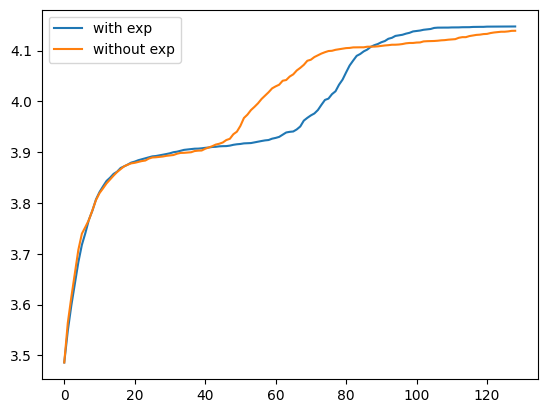

In [45]:
import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_44.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__43.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
key_name = 'avg_top100'
for i in range(len(file['results'])):
    top1a.append(file['results'][i][key_name])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][key_name])


plt.plot(top1a,label='with exp')
plt.plot(top1b,label='without exp')
plt.legend()
plt.show()

In [ ]:
# 原始数据
x = [100, 200, 300, 4500, 5000]
y = [0.1, 0.15, 0.2, 0.5, 0.55]

# 创建新列表用于补全
def fix_xy(x,y):
    new_x = []
    new_y = []

    for i in range(len(x) - 1):
        new_x.append(x[i])
        new_y.append(y[i])

        # 当前和下一个之间是否有断档（步长100）
        gap = x[i + 1] - x[i]
        if gap > 100:
            # 补上中间的点，间隔100
            for inter_x in range(x[i] + 100, x[i + 1], 100):
                new_x.append(inter_x)
                new_y.append(y[i])  # 用当前值补上

    # 加上最后一个点
    new_x.append(x[-1])
    new_y.append(y[-1])
    return new_x,new_y

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

def read_files_as_array(root,keyname,file_num=3,molopt=False):
    arrays = []
    xs = []
    for i in range(file_num):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        array = []
        x = []
        if molopt:
            for j in range(len(file)):
                array.append(file[j][keyname])
                x.append(file[j]['n_oracles'])
            x,array = fix_xy(x,array)
        else:
            for j in range(len(file['results'])):
                array.append(file['results'][j][keyname])
                x.append(file['results'][j]['all_unique_moles'])
        arrays.append(array)
        xs.append(x)
    return xs,arrays

def plot_mean_std(root,keyname,label,file_num = 3,color='blue',molopt=False):
    # step 1: 裁剪为最短长度（也可以插值到相同长度）
    xs,arrays = read_files_as_array(root,keyname,file_num=file_num,molopt=molopt)
    min_len = min([len(arr) for arr in arrays])
    arrays = [arr[:min_len] for arr in arrays]
    xs = np.array([arr[:min_len] for arr in xs])
    xs = xs.mean(axis=0)

    # step 2: 叠在一起构成二维数组 (3, min_len)
    all_arrs = np.vstack(arrays)

    # step 3: 计算均值和标准差
    mean = np.mean(all_arrs, axis=0)
    std = np.std(all_arrs, axis=0)
    
    plt.plot(xs, mean, color=color, label=label, linewidth=2)
    plt.fill_between(xs, mean - std, mean + std, color=color, alpha=0.3,)

colors = [
    'tomato',        # 略带橘调的红色
    'royalblue',     # 稳重明亮的蓝色
    'seagreen',      # 温柔的绿色
    'darkorange',    # 强烈而有活力的橙色
    'mediumpurple',  # 淡雅的紫色
    'gold',          # 明亮金黄，像荧光笔
    'deepskyblue',   # 鲜艳清新的蓝色
    'hotpink',       # 活泼的粉色
    'slategray',     # 稳重的灰蓝色
    'olivedrab'      # 复古绿调
]


In [ ]:
with open('/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_42.json','r') as f:
    file = json.load(f)


{'all_unique_moles': 5000,
 'llm_calls': 2957,
 'Uniqueness': 0.9142181695518038,
 'Validity': 0.9132049983260376,
 'avg_top1': 4.205417728616168,
 'avg_top10': 4.19297755993123,
 'avg_top100': 4.136325547737391,
 'top1_auc': 4.072432545546389,
 'top10_auc': 4.026935617664032,
 'top100_auc': 3.9465526575177727,
 'hypervolume': 0.9167041125795712,
 'div': 0.5065259789363821,
 'generated_num': 5922}

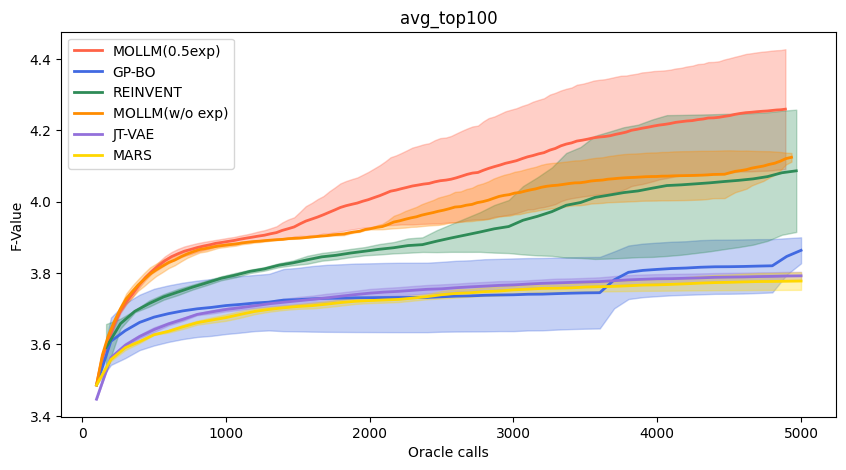

In [40]:

keyname = 'avg_top100'
plt.figure(figsize=(10, 5))
root = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json'
plot_mean_std(root,keyname,file_num=5,label='MOLLM(0.5exp)',color=colors[0])

root = '/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='GP-BO',color=colors[1],molopt=True)

root = '/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='REINVENT',color=colors[2],molopt=True)

root = '/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__{}.json'
plot_mean_std(root,keyname,label='MOLLM(w/o exp)',color=colors[3])

root = '/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='JT-VAE',color=colors[4],molopt=True)

root = '/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='MARS',color=colors[5],molopt=True)

import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.3_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
for i in range(len(file['results'])):
    top1a.append(file['results'][i][keyname])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][keyname])


#plt.plot(top1a,label='with exp with mols 0.3 ')
#plt.plot(top1b,label='with exp with mols 0.5 ')


plt.title(f'{keyname}')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


In [ ]:
root = '/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json.json'
